<b>Objective : COVID_19 Death Rate

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Covid.csv')

In [3]:
data

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [4]:
data.columns

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

In [5]:
data.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [6]:
data.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


<b> Relating the data using Visualisation

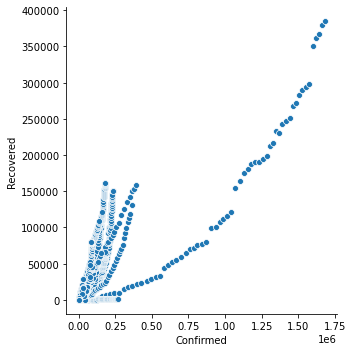

In [10]:
#Relation between confirmed and Recovered cases
sns.relplot(x='Confirmed',y="Recovered",data=data)

In Above Graph, initially very few people recovered, but when number of caases increased, we can see the number of recovered cases also improved.

------------

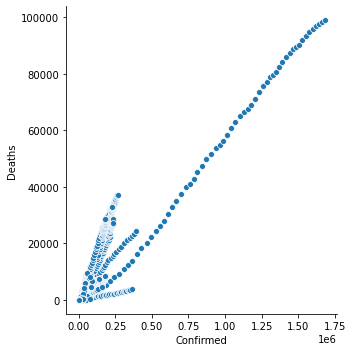

In [11]:
#Relation between confirmed and Death cases
sns.relplot(x='Confirmed',y="Deaths",data=data)

Dead Cases are equally porportional to the number of confirmed cases.

-----------------------------------

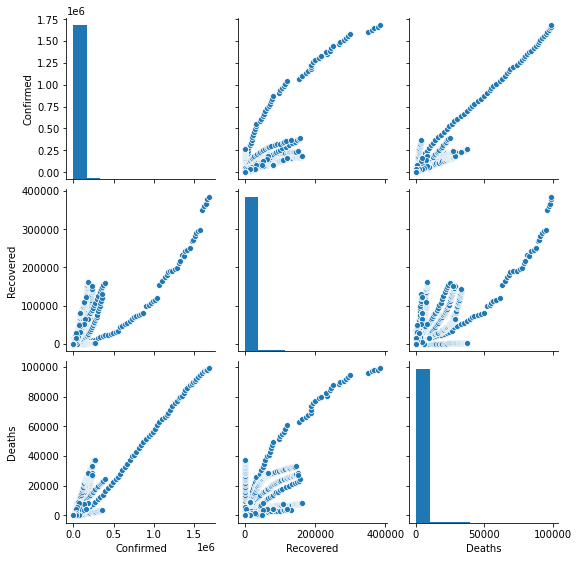

In [13]:
sns.pairplot(data)

<b> Using Linear regression Method

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [20]:
y=data['Confirmed']
x=data.drop(['Confirmed','Date','Country'],axis=1)

In [21]:
scaler = MinMaxScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Recovered,Deaths
0,0.000000,0.000000
1,0.000000,0.000000
2,0.000000,0.000000
3,0.000000,0.000000
4,0.000000,0.000000
...,...,...
23683,0.000948,0.000030
23684,0.000016,0.000010
23685,0.000026,0.000495
23686,0.000873,0.000071


In [22]:
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.7)

In [23]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
print (model.score(X_test,y_test))

0.8762189313714568
